In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns
# For importing the boston house dataset
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import scipy.stats as stats
# For building neural networks.
import keras as kr
# For encoding categorical variables.
import sklearn.preprocessing as pre
# For splitting into training and test sets.
import sklearn.model_selection as mod
# For whitening the inputs
import sklearn.decomposition as dec
# Set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 5.0)

Using TensorFlow backend.
C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

# Description

- I take the dataset from sklearn package and show its description:

In [2]:
# Stored the dataset in a variable, DS -dataset-
DS = load_boston()
# Dataset characteristics:
print(DS.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

---
- Then there is 506 rows and 13 attributes other than the price median value (target). 
- This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.
- Now I create a pandas data frame to display the header of the table as a sample:

In [3]:
print('(#rows, #columns):', DS.data.shape) #shows count of rows and columns
bhp = pd.DataFrame(DS.data, columns=DS.feature_names) # bhp stands for Boston house prices
bhp.index += 1 #starting the index from 1 instead of 0 (first row is still indexed as 0)
bhp['MEDV'] = DS.target # Adding prices -MEDV- to the table
bhp.head() # .head() shows just the first five rows

(#rows, #columns): (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


For a first glance there is an option to describe all the attributes of the dataset individually and visualize their distribution by twos. That is what the code from the cell below shows, it is commented because it takes a lot of space and much information returned is not revealing. Following, I will summarise the main features of the dataset but if you are curious enough you may want to uncomment the block and rerun the cell. 

In [4]:
# # The pairplot function of seaborn draws scatterplots for joint relationships and histograms for univariate distributions
# sns.pairplot(bhp)
# plt.show()
# # shows count, mean, std, min, 25%, 50%, 75% and max of all attributes 
# bhp.describe().T # .describe() shows count, mean, std, min, 25%, 50%, 75% and max.T switches position of headers and first column just for a better fit of the table on the page

- Making sure that all the values are floats and check if any of them are missing:

In [5]:
bhp.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
bhp.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- All are floats and there is no missing values.
- The main atribute, which this notebook focuses on, is the price of the houses (__MEDV__, median value of the price in $1000's)


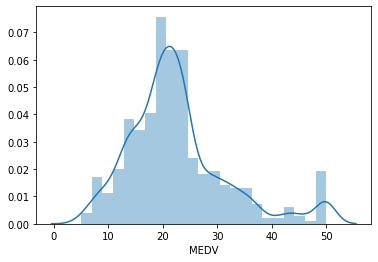

In [7]:
# Histogram of the price attribute
sns.distplot(bhp['MEDV']) # Passing the MEDV -price- column to the distplot() function of seaborn
plt.show()

- It shows the typical bell-like shape which charaterises the normal distribution. There is more observations concentrated on the smaller range side (left) with an outstanding rise on the highest price side (right). There seemed to be, back then, a paralell high-end market totally independent of the rest of the market. Perhaps this range of price was wider than the others.

And the figures below represent the shape of the bell: 75% of the values are up to 25.00, which is near the mean (22.53) and the 25% remider until 50.00, reason why the shape of the right tale is smoother.

In [8]:
# Data exploration
bhp['MEDV'].describe() # Description of the price -MEDV- column

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

- There is a <u>moderate to strong linear correlation</u> between price (__MEDV__) and number of rooms (__RM__) with a correlation coefficient of 0.69. 

In [9]:
bhp['RM'].corr(bhp['MEDV'])

0.695359947071539

The plot suggests the existence of a linear correlation despite the presence of some outliers. Now I will plot it along with its regression line in red:

m = 9.1021; c = -34.6706


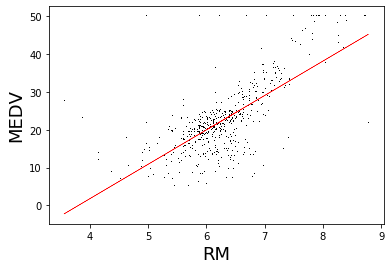

In [10]:
# plotting both variables with small black dots 
plt.plot(bhp['RM'],bhp['MEDV'], 'k,')
# getting the parameters from the regression line that best fit these pair of coordinates
m, c = np.polyfit(bhp['RM'], bhp['MEDV'], 1)
print('m = %.4f; c = %.4f' %(m,c)) # %.4f to show just 4 decimal points
# drawing the regression line in red
plt.plot(bhp['RM'], m * bhp['RM'] + c, 'r', linewidth=0.5)
# setting axes labels
plt.xlabel('RM', fontsize=18)
plt.ylabel('MEDV', fontsize=18)
plt.show()

Then the function that defines this linear correlation is:

$$ MEDV = 9.1\times LSTAT - 34.67 $$


- And this correlation between price and number of rooms tends to be the rule in practice.
- Also there is a <u>moderate to strong negative linear correlation</u> with a coefficient of -0.74 between price (__MEDV__) and the proportion of population with limited resources (__LSTAT__). This is, the greater proportion of this population, the lower the price is.
- However when plotting this two ocurrences I do not see a linear relation, but a quadratic or even an asymptotic-like one:

m = 0.0435; n = -2.3328; c = 42.8620


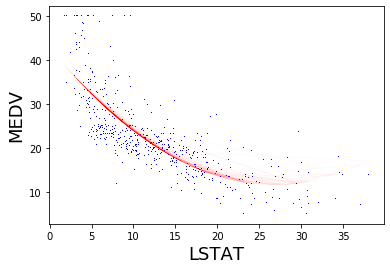

In [11]:
# plotting both variables with small blue dots 
plt.plot(bhp['LSTAT'],bhp['MEDV'], 'b,')
# getting the parameters from the regression line that best fit these pair of coordinates
m, n, c = np.polyfit(bhp['LSTAT'], bhp['MEDV'], 2)
# drawing the regression line in red
plt.plot(bhp['LSTAT'], m*bhp['LSTAT']**2 + n * bhp['LSTAT'] + c, 'r-', linewidth=0.02)
# setting axes labels
plt.xlabel('LSTAT', fontsize=18)
plt.ylabel('MEDV', fontsize=18)
print('m = %.4f; n = %.4f; c = %.4f' %(m,n,c)) # %.4f to show just 4 decimal points

And the function that defines this quadratic correlation is:

$$ MEDV = 0.04\times LSTAT^2 - 2.33\times LSTAT + 42.86$$

And this fact leads me to check the distribution of the population:

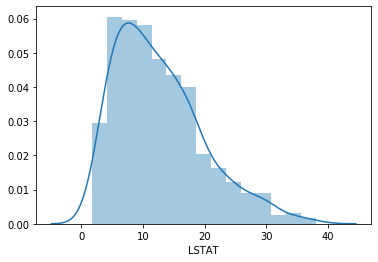

In [12]:
sns.distplot(bhp["LSTAT"]) # Passing the LSTAT column to the distplot() function of seaborn
plt.show()

We see that LSTAT also has a normal distribution and is skweded right as most of the occurences gather on the left side, where there is lower percentage of population with lower status. For this reason the right tale is longer. 

Tipically, the mean is larger than the median. Let's see the figures:

In [13]:
np.median(bhp['LSTAT'])

11.36

In [14]:
bhp['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

And the mean is greater than the median indeed. Also according to the right-skewed feature mentioned, the 75% of the areas studied have up to a 17% -roughly- of population with lower status when the maximum value is nearly 40%, which is over double. This is, between the minimum and maximum values measured (1.7% and 37.9%), three quarters of them (75%) are gathered below the 17%. 

Similarly, CRIM, DIS and NOX follow a normal distribution skewed right, and on the contrary AGE and PTRATIO are skewed left with their corresponding oposite features. In order to show an example I will plot PTRATIO:

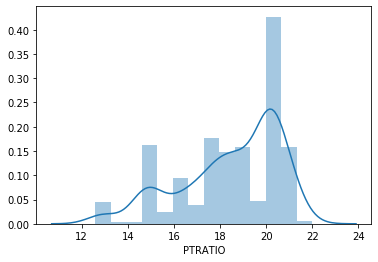

In [15]:
sns.distplot(bhp["PTRATIO"])
plt.show()
# pupil-teacher ratio by town

And finally INDUS, RAD and TAX have a bimodal distribution with two peaks each. They have two data ranges that appear most often in the dataset giving it this particular shape, like two bells close to each other. As a sample I will plot INDUS where there is two clear tendencies, towns with around 5% of non-retail business acres, or else towns with around 17% of non-retail acres. It would be interesting to look into the observances of these two peaks, check their other attributes to, on a latter stage, compare them between themselvesand between the other segments of the distribution.

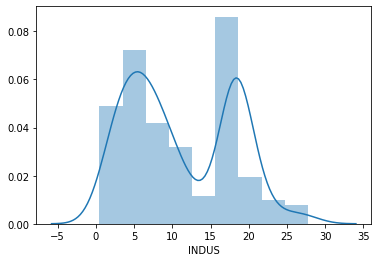

In [16]:
sns.distplot(bhp["INDUS"])
plt.show()

Same as before, feel free to uncomment the cell below if you would like to see the histograms of all the varialbes

In [17]:
# for x in bhp.columns: # for loop to iterate through all of the columns -attributes- and plot their histogram
#     sns.distplot(bhp[x])
#     plt.show()

- It is also worth mentioning that I left CHAR aside since it is a categorical variable, equivalent to True and False depending on whether or not the houses are on the river bank. This is encoded in the dataset as 1 and 0 respectively which is convenient for later on when this variable will be handled by a neural network.

In [18]:
# Data exploration
bhp.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Inference

Here I will try to show if there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. For this analysis I am going to create two arrays which hold the values of the price from houses located on the river bank (where column CHAS is 1) and a different array that contains the price of the properties away from it (where column CHAS is 0)

In [19]:
# Creating two arrays which contain the MEDV values from properties on the river bank and away from it:
Bank = []
NotBank = []

# for loop to iterate row after row along the data frame:
for index, row in bhp.iterrows():
    if (row['CHAS'] == 0):
        NotBank.append(row['MEDV'])
    else:
        # CHAS values are either 0 or 1 so this else statement only considers the ones.
        Bank.append(row['MEDV'])
        
ttest = stats.ttest_ind(Bank, NotBank)

print(len(Bank), ' - mean = ', np.mean(Bank), ' - NotBank length = ', len(NotBank), ' - mean = ', np.mean(NotBank))

print(ttest)

35  - mean =  28.439999999999998  - NotBank length =  471  - mean =  22.093842887473464
Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


Then pvalue is 7.4 x 10<sup>-5</sup>, with such low probability I can reject the null hypothesis and consider the medians of the price differ significantly.

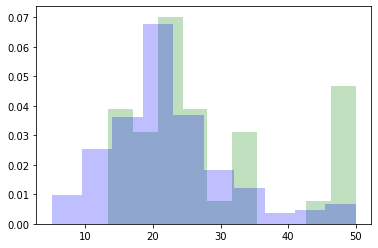

In [20]:
#sns.distplot(Bank)
#sns.distplot(NotBank)

# Plot histograms of the two samples.
plt.hist(Bank, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(NotBank, density=True, color='b', alpha=0.25, label="Sample B")

plt.show()

In [21]:
print(np.var(Bank))
np.var(NotBank)

135.64354285714285


77.8273718564197

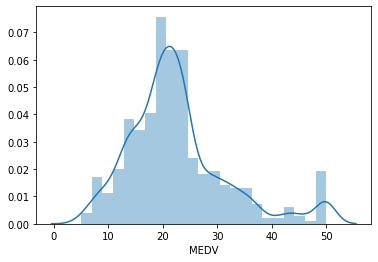

In [22]:
sns.distplot(bhp['MEDV']) 

plt.show()

In [23]:
print('On the river bank',Bank.count(50), 'values out of',len(Bank), 'are 50,', 'whereas away from it, just', NotBank.count(50), 'out of',len(NotBank))

On the river bank 6 values out of 35 are 50, whereas away from it, just 10 out of 471


In [24]:
NotBank.count(50)

10

In [25]:
stats.f_oneway(Bank,NotBank)

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

In [26]:
# sns.distplot(bhp["RM"])
# plt.show()
# # average number of rooms per dwelling

# Prediction

In order to predict the price of a house according to some attributes input I will configure a neural network with keras. 
VARIATIONS: 
- attributes chosen
- test_size=0.3
- number of neuron layers
- number of neuron layers
- activation functions: tanh, relu, 
- loss='mean_squared_error', not many variations possible
- optimizer='sgd'or 'adam'

In [57]:
# Separate the inputs from the rest of the variables.
inputs = bhp[['CRIM','INDUS','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO']]
outputs = bhp[['MEDV']]
inputs

,CRIM,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO
1,0.00632,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3
2,0.02731,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8
3,0.02729,7.07,0.0,0.469,7.185,4.9671,2.0,242.0,17.8
4,0.03237,2.18,0.0,0.458,6.998,6.0622,3.0,222.0,18.7
5,0.06905,2.18,0.0,0.458,7.147,6.0622,3.0,222.0,18.7
...,...,...,...,...,...,...,...,...,...
502,0.06263,11.93,0.0,0.573,6.593,2.4786,1.0,273.0,21.0
503,0.04527,11.93,0.0,0.573,6.120,2.2875,1.0,273.0,21.0
504,0.06076,11.93,0.0,0.573,6.976,2.1675,1.0,273.0,21.0
505,0.10959,11.93,0.0,0.573,6.794,2.3889,1.0,273.0,21.0


In [58]:
# Split the inputs and outputs into training and test sets. Standard way of training neural network tests. Training network on 70% of the data set and the 30% for testing -test_size=0.3-. Eventually train it on the whole dataset
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.3)
# test_size=0.5, takes half of the data set to train beforehand

In [59]:
# Starting a neural network, sequential for building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 10 neurons and an input layer with 12.
model.add(kr.layers.Dense(units=10, activation='tanh', input_dim=9)) # input_dim=12, the twelve values from dataset.

# Add another hidden layer 
model.add(kr.layers.Dense(units=20, activation='relu')) 

# Add another hidden layer 
model.add(kr.layers.Dense(units=10, activation='tanh')) 
          
# Add a one neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear')) # Price is the only output I expect

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
# loss='categorical_crossentropy' is a standard loss function for a categorical variable.

In [60]:
# Train the neural network.
model.fit(inputs_train, outputs_train, epochs=80, batch_size=5)

Epoch 1/80
354/354 [==============================] - 0s 664us/step - loss: 113.0047 - accuracy: 0.0056
Epoch 2/80
354/354 [==============================] - 0s 326us/step - loss: 92.1607 - accuracy: 0.0113
Epoch 3/80
354/354 [==============================] - 0s 268us/step - loss: 93.3424 - accuracy: 0.0141
Epoch 4/80
354/354 [==============================] - 0s 305us/step - loss: 90.3458 - accuracy: 0.0141
Epoch 5/80
354/354 [==============================] - 0s 206us/step - loss: 92.9023 - accuracy: 0.0085
Epoch 6/80
354/354 [==============================] - 0s 347us/step - loss: 92.0822 - accuracy: 0.0141
Epoch 7/80
354/354 [==============================] - 0s 288us/step - loss: 92.1085 - accuracy: 0.0085
Epoch 8/80
354/354 [==============================] - 0s 311us/step - loss: 93.0161 - accuracy: 0.0085
Epoch 9/80
354/354 [==============================] - 0s 260us/step - loss: 92.5706 - accuracy: 0.0056
Epoch 10/80
354/354 [==============================] - 0s 226us/step - l

354/354 [==============================] - 0s 342us/step - loss: 91.7801 - accuracy: 0.0028
Epoch 79/80
354/354 [==============================] - 0s 294us/step - loss: 93.5037 - accuracy: 0.0113
Epoch 80/80
354/354 [==============================] - 0s 288us/step - loss: 93.7646 - accuracy: 0.0085


In [61]:
# predictions on the test set
pred1 = model.predict(inputs_test)

In [62]:
# values from the test set
outTest1 = outputs_test.as_matrix().astype(np.float32)

C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [63]:
pred1.T # all the values are repeated. After several tries only scaling the dataset solved it

array([[22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.125137, 22.125137, 22.125137, 22.125137,
        22.125137, 22.125137, 22.12513

In [64]:
# Calculate the loss function, mean squared error in this case. The higher the value output the worse
model.evaluate(inputs_test, outputs_test)

152/152 [==============================] - 0s 428us/step


[71.27451444927014, 0.00657894741743803]

----
The predictions are not valid since they are all reapeated. In order to improve the efficiency of the neural network I will **scale** it


In [65]:
# Standard scaler from the preprocessing library 
scaler = pre.StandardScaler()
scaler.fit(inputs_train)
inputs_train_scaled = scaler.transform(inputs_train)

In [66]:
# Starting a neural network, sequential for building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 10 neurons and an input layer with 12.
model.add(kr.layers.Dense(units=10, activation='tanh', input_dim=9)) # input_dim=12, the twelve values from dataset.

# Add another hidden layer 
model.add(kr.layers.Dense(units=20, activation='relu')) 

# Add another hidden layer 
model.add(kr.layers.Dense(units=10, activation='tanh')) 
          
# Add a one neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear')) # Price is the only output I expect

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
# loss='categorical_crossentropy' is a standard loss function for a categorical variable.

In [67]:
# Train again the neural network.
model.fit(inputs_train_scaled, outputs_train, epochs=80, batch_size=5)

Epoch 1/80
354/354 [==============================] - 0s 653us/step - loss: 95.3472 - accuracy: 0.0113
Epoch 2/80
354/354 [==============================] - 0s 296us/step - loss: 48.5579 - accuracy: 0.0113
Epoch 3/80
354/354 [==============================] - 0s 353us/step - loss: 41.8230 - accuracy: 0.0085
Epoch 4/80
354/354 [==============================] - 0s 356us/step - loss: 45.7856 - accuracy: 0.0028
Epoch 5/80
354/354 [==============================] - 0s 271us/step - loss: 39.3668 - accuracy: 0.0141
Epoch 6/80
354/354 [==============================] - 0s 249us/step - loss: 40.4761 - accuracy: 0.0056
Epoch 7/80
354/354 [==============================] - 0s 274us/step - loss: 40.9306 - accuracy: 0.0085
Epoch 8/80
354/354 [==============================] - 0s 274us/step - loss: 36.6952 - accuracy: 0.0028
Epoch 9/80
354/354 [==============================] - 0s 269us/step - loss: 37.0853 - accuracy: 0.0056
Epoch 10/80
354/354 [==============================] - 0s 269us/step - lo

354/354 [==============================] - 0s 367us/step - loss: 48.4974 - accuracy: 0.0113
Epoch 80/80
354/354 [==============================] - 0s 253us/step - loss: 48.5639 - accuracy: 0.0056


In [68]:
# Predictions 
inputs_test_scaled = scaler.transform(inputs_test)
pred2 = model.predict(inputs_test_scaled).T
pred2_1D = pred2[0] # isolating the first element of the 2D array pred2 which contains the predictions so that it can be joined with the array which contains the outputs and can be displayed per pairs for comparison purposes

In [69]:
outTest2 = outputs_test.as_matrix().astype(np.float32)

C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [70]:
# show predictions and actual values
print('\nPrediction scaled   vs  [Expected]\n') # '\u0332'.join to underline text
table = '\n'.join('{}       {}'.format(x, y) for x, y in zip(pred2_1D, outTest2))
print(table)


Prediction scaled   vs  [Expected]

24.361806869506836       [18.7]
24.361804962158203       [19.7]
24.361804962158203       [15.]
24.361804962158203       [31.1]
24.361806869506836       [23.3]
24.361806869506836       [27.5]
24.361804962158203       [25.]
24.361806869506836       [21.]
24.361806869506836       [23.4]
17.52644920349121       [8.4]
42.733489990234375       [31.5]
42.733489990234375       [33.2]
24.361806869506836       [19.4]
42.733489990234375       [33.8]
42.707828521728516       [28.7]
15.813194274902344       [13.1]
17.52644920349121       [14.1]
24.361806869506836       [18.4]
24.361806869506836       [20.1]
24.361806869506836       [20.7]
17.52644920349121       [8.3]
17.52644920349121       [12.]
24.361806869506836       [22.5]
17.52644920349121       [19.9]
24.361804962158203       [20.5]
24.361806869506836       [20.1]
24.36180305480957       [23.2]
23.923444747924805       [25.1]
24.36180305480957       [30.1]
24.361806869506836       [18.5]
17.5264492034912

In [71]:
# Evaluating the network again
model.evaluate(inputs_test, outputs_test)

152/152 [==============================] - 0s 480us/step


[88.94196520353618, 0.00657894741743803]

---
And now I will **whiten** the dataset

In [73]:
pca = dec.PCA(n_components=9, whiten=True)
pca.fit(inputs_train)
inputs_train_white = pd.DataFrame(pca.transform(inputs_train), columns = inputs.columns)
inputs_train_white

,CRIM,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO
0,-0.488927,-0.107085,-0.664517,-0.123066,-0.822903,0.750773,-0.183822,-0.395883,-0.997378
1,-0.049793,-0.255991,1.785905,0.562122,-1.980792,-0.173755,-0.446560,-0.825441,3.177744
2,-0.618868,0.063297,0.041554,0.099768,1.670708,-0.399635,-0.550890,0.096609,0.852796
3,-0.618830,0.091788,0.044275,0.107612,1.646507,-0.442820,0.042775,0.037744,0.945794
4,-0.491269,-0.208496,-1.367096,1.671259,-2.116410,1.308733,0.079596,-0.368545,-0.561842
...,...,...,...,...,...,...,...,...,...
349,1.510253,0.649337,-0.190753,-0.437151,0.085084,0.654705,-0.174167,-0.259802,-1.266711
350,-0.049495,-0.038378,1.816129,0.645609,-1.934905,-0.153077,-1.523708,-0.697817,2.966877
351,-0.618309,0.088218,-0.509347,-0.798958,-0.549686,-1.088376,3.409336,-0.822628,-0.006964
352,-0.701913,0.036594,-0.683116,-0.238624,-0.371393,1.926137,-0.091053,-0.272212,-0.451520


In [78]:
# rebuid the neural network
model = kr.models.Sequential()

# Add a hidden layer with 10 neurons and an input layer with 12.
model.add(kr.layers.Dense(units=50, activation='tanh', input_dim=9)) # input_dim=12, the twelve values from dataset.

# Add another hidden layer 
model.add(kr.layers.Dense(units=10, activation='tanh')) 
          
# Add a one neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
# loss='categorical_crossentropy' is a standard loss function for a categorical variable.

In [79]:
# Train again the neural network.
model.fit(inputs_train_white, outputs_train, epochs=80, batch_size=5)

Epoch 1/80
354/354 [==============================] - 0s 548us/step - loss: 104.2301 - accuracy: 0.0028
Epoch 2/80
354/354 [==============================] - 0s 274us/step - loss: 38.5871 - accuracy: 0.0028
Epoch 3/80
354/354 [==============================] - 0s 274us/step - loss: 39.6637 - accuracy: 0.0085
Epoch 4/80
354/354 [==============================] - 0s 319us/step - loss: 33.9009 - accuracy: 0.0028
Epoch 5/80
354/354 [==============================] - 0s 291us/step - loss: 33.7238 - accuracy: 0.0198
Epoch 6/80
354/354 [==============================] - 0s 274us/step - loss: 33.3687 - accuracy: 0.0085
Epoch 7/80
354/354 [==============================] - 0s 271us/step - loss: 29.9678 - accuracy: 0.0000e+00
Epoch 8/80
354/354 [==============================] - 0s 262us/step - loss: 32.8746 - accuracy: 0.0141
Epoch 9/80
354/354 [==============================] - 0s 350us/step - loss: 31.4751 - accuracy: 0.0113
Epoch 10/80
354/354 [==============================] - 0s 319us/step

354/354 [==============================] - 0s 296us/step - loss: 11.5049 - accuracy: 0.0198
Epoch 80/80
354/354 [==============================] - 0s 339us/step - loss: 11.5779 - accuracy: 0.0169


In [80]:
# Predictions 
pred3 = model.predict(inputs_train_white).T
pred3_1D = pred3[0] # isolating the first element of the 2D array pred2 which contains the predictions so that it can be joined with the array which contains the outputs and can be displayed per pairs for comparison purposes

In [81]:
pred3_1D

array([23.367752 , 17.722973 , 18.028244 , 18.082905 , 31.182396 ,
       21.613903 ,  9.45802  , 15.082355 , 23.362484 , 23.44616  ,
       22.944157 , 19.813148 , 15.082846 , 30.08685  , 20.032959 ,
       18.069672 , 30.139679 , 18.130947 , 12.847424 , 12.847054 ,
       18.368809 , 12.510868 , 27.872559 , 21.84834  , 15.081737 ,
       36.47162  , 22.099648 , 23.161404 , 22.874706 , 15.083677 ,
       47.58578  , 18.819416 , 21.861649 , 21.517632 , 17.931541 ,
       30.106728 , 17.45502  , 17.74282  , 26.36929  , 27.089436 ,
       17.99274  , 47.60391  , 30.154278 , 15.00876  , 41.46332  ,
       18.359188 , 15.075401 , 15.082823 , 15.068985 , 31.16867  ,
       22.98722  , 18.544704 , 17.952599 , 23.21355  , 21.868973 ,
       14.938217 , 23.421669 , 17.682316 , 22.964031 , 21.819836 ,
       31.25777  , 23.363075 , 15.047407 , 18.49311  , 23.468937 ,
        9.440228 , 47.601223 ,  5.019092 , 30.023808 , 36.153736 ,
       15.087216 , 17.739887 , 22.656952 , 30.157833 , 22.9861

In [82]:
outTest3 = outputs_test.as_matrix().astype(np.float32)

C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [83]:
# show predictions and actual values
print('\nPrediction whitened vs [Expected]\n') # '\u0332'.join to underline text
table2 = '\n'.join('{}       {}'.format(x, y) for x, y in zip(pred3_1D, outTest3))
print(table2)


Prediction whitened vs [Expected]

23.367752075195312       [18.7]
17.722972869873047       [19.7]
18.028244018554688       [15.]
18.082904815673828       [31.1]
31.182395935058594       [23.3]
21.613903045654297       [27.5]
9.458020210266113       [25.]
15.082354545593262       [21.]
23.362483978271484       [23.4]
23.44615936279297       [8.4]
22.944156646728516       [31.5]
19.813148498535156       [33.2]
15.082845687866211       [19.4]
30.086849212646484       [33.8]
20.032958984375       [28.7]
18.069671630859375       [13.1]
30.139678955078125       [14.1]
18.13094711303711       [18.4]
12.847423553466797       [20.1]
12.847053527832031       [20.7]
18.36880874633789       [8.3]
12.510868072509766       [12.]
27.87255859375       [22.5]
21.848339080810547       [19.9]
15.08173656463623       [20.5]
36.47161865234375       [20.1]
22.099647521972656       [23.2]
23.16140365600586       [25.1]
22.874706268310547       [30.1]
15.083677291870117       [18.5]
47.58578109741211       

In [84]:
# Evaluating the network again
model.evaluate(inputs_test, outputs_test)

152/152 [==============================] - 0s 368us/step


[254.7539745130037, 0.0]